In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading training loss values from the csv file into a numpy array
trainingloss = np.loadtxt('traininglossvepsilon.csv', delimiter=',')
#loading training classification accuracy values from the csv file into a numpy array
trainingacc = np.loadtxt('trainingaccvepsilon.csv', delimiter=',')

#loading test loss values from the csv file into a numpy array
testloss = np.loadtxt('testlossvepsilon.csv', delimiter=',')
#loading test classification accuracy values from the csv file into a numpy array
testacc = np.loadtxt('testaccvepsilon.csv', delimiter=',')

In [3]:
#configure font properties for the plots
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size':13})
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 1

In [4]:
#create an array of $\epsilon$ values ranging from 0 to 0.45 with a step of 0.05
epsilon = np.arange(0, 0.45+0.05, 0.05)

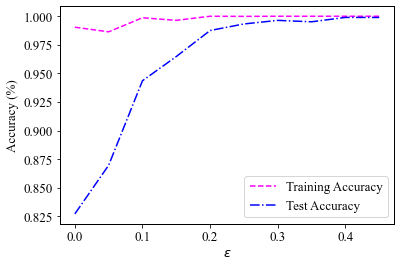

In [5]:
#plot the training and test classification accuracy against the epsilon values 
plt.plot(epsilon, trainingacc, '--',label='Training Accuracy', color='magenta')
plt.plot(epsilon, testacc, '-.', label='Test Accuracy', color='blue')
plt.xlabel("$\epsilon$")
plt.ylabel(r"Accuracy (%)")
plt.legend()
plt.savefig('distancebetweenpeaks.pdf')

# Correlation analysis for trajectories with two peaks

In [6]:
#load prediction data for the trajactories with two peaks for different categories (labelled by the model as having
#one, two or three peaks)
predictions2labelled1 = np.loadtxt('Predictions/predictions2labelled1_epsilon0.0.csv', delimiter=',')
predictions2labelled2 = np.loadtxt('Predictions/predictions2labelled2_epsilon0.0.csv', delimiter=',')
predictions2labelled3 = np.loadtxt('Predictions/predictions2labelled3_epsilon0.0.csv', delimiter=',')

#concatenate the predictions for all three categories
predictions = np.concatenate((predictions2labelled1, predictions2labelled2))
predictions = np.concatenate((predictions, predictions2labelled3))

#extract the fourth column from the concatenated array, which corresponds to the indices of the trajectories in
#the original array, and convert them to integers
indices = predictions[:,3].astype(int)

#load the corresponding true labels from the csv file
ytrain2 = np.loadtxt('../Data/Ytrain2.csv', delimiter=',')

In [7]:
#initialise an array to hold feature data for each index
features = np.zeros((len(indices), 20))

#extract the parameters corresponding to each lorentzian peak in the SD
params1 = ytrain2[indices,:][:,1:4] 
params2 = ytrain2[indices,:][:,5:8]

#extract the individual parameter values for each peak

#extract positions of the peaks
nus = ytrain2[indices,:][:,[2, 6]]

#extract the width parameters
gammas = ytrain2[indices,:][:,[1,5]]

#extract the coupling strengths
lambdas = ytrain2[indices,:][:,[3,7]]

#loop through each index to compute features
for i in range(len(indices)):
    
    #sort the positions of the peaks for consistency
    sortednus = nus[i,:].argsort()

    #check the order of sorted $\nu$ values and concatenate the corresponding parameters
    #if the first $\nu$ is the smallest
    if sortednus[0]==0:
        #concatenate the parameters with the ones corresponding to the first $\nu$ first
        sortedparams = np.concatenate((params1[[i],:], params2[[i],:]), axis = 1)
        
    else:
        #if the second $\nu$ is smallest, concatenate the parameters with those corresponding to the second $\nu$ 
        #first
        sortedparams = np.concatenate((params2[[i],:], params1[[i],:]), axis=1)

    #store the sorted parameters in the features array
    features[i,0:6] = sortedparams
    
    #calculate the mean, maximum and minimum width parameters and store them in the features array
    features[i,6] = np.mean(gammas[i,:]) #mean $\gamma$
    features[i,7] = np.amax(gammas[i,:]) #max $\gamma$
    features[i,8] = np.amin(gammas[i,:]) #min $\gamma$

    #calculate the average position of the peaks and store it in the features array
    features[i,9] = np.mean(nus[i,:]) #mean $\nu$

    #calculate the mean, maximum and minimum coupling strengths and store them in the features array
    features[i,10] = np.mean(lambdas[i,:]) #mean $\lambda$
    features[i,11] = np.amax(lambdas[i,:]) #max $\lambda$
    features[i,12] = np.amin(lambdas[i,:]) #min $\lambda$
    
    #calculate the distance between the peaks
    features[i,13] =  np.abs(nus[i,0]-nus[i,1]) #distance between
    
    #calculate the distances of the peaks from $omega_0$
    distancefrom1 = np.abs(1-nus[i,0])
    distancefrom2 = np.abs(1-nus[i,1])
    
    #store the mean, maximum and minimum distances from $\omega_0$ in the features array
    features[i,14] = np.mean([distancefrom1, distancefrom2]) #mean distance from
    features[i,15] = np.amax([distancefrom1, distancefrom2]) #max distance from
    features[i,16] = np.amin([distancefrom1, distancefrom2]) #min distance from

#store the predictions in the last three columns of the features array
features[:,17:20] = predictions[:,0:3]

In [8]:
#calculate the correlation coefficient between the prediction values and various features 
corrpredgamma1 = np.corrcoef(features[:,18], features[:,0]) #$\gamma_1$
corrprednu1 = np.corrcoef(features[:,18], features[:,1]) #$\nu_1$
corrpredlambda1 = np.corrcoef(features[:,18], features[:,2]) #$\lambda_1$
corrpredgamma2 = np.corrcoef(features[:,18], features[:,3]) #$\gamma_2$
corrprednu2 = np.corrcoef(features[:,18], features[:,4]) #$\nu_2$
corrpredlambda2 = np.corrcoef(features[:,18], features[:,5]) #$\lambda_2$

#print the correlation coefficients for each feature 
print("Correlation between prediction and gamma1:", corrpredgamma1[0,1])
print("Correlation between prediction and nu1:", corrprednu1[0,1])
print("Correlation between prediction and lambda1:", corrpredlambda1[0,1])
print("Correlation between prediction and gamma2:", corrpredgamma2[0,1])
print("Correlation between prediction and nu2:", corrprednu2[0,1])
print("Correlation between prediction and lambda2:", corrpredlambda2[0,1])

Correlation between prediction and gamma1: -0.013962510175016174
Correlation between prediction and nu1: -0.15757468036354255
Correlation between prediction and lambda1: -0.13485554235045183
Correlation between prediction and gamma2: -0.10003264395341419
Correlation between prediction and nu2: -0.06226163152958565
Correlation between prediction and lambda2: -0.2544732482879083


In [9]:
#calculate the correlation coefficient between the prediction values and various features 
corrpredavgamma = np.corrcoef(features[:,18], features[:,6]) #mean $\gamma$ 
corrpredmaxgamma = np.corrcoef(features[:,18], features[:,7]) #max $\gamma$
corrpredmingamma = np.corrcoef(features[:,18], features[:,8]) #min $\gamma$
corrpredavnu = np.corrcoef(features[:,18], features[:,9]) #mean $\nu$
corrpredavlambda = np.corrcoef(features[:,18], features[:,10]) #mean $\lambda$
corrpredmaxlambda = np.corrcoef(features[:,18], features[:,11]) #max $\lambda$
corrpredminlambda = np.corrcoef(features[:,18], features[:,12]) #min $\lambda$

#print the correlation coefficients for each feature
print("Correlation between prediction and average gamma:", corrpredavgamma[0,1])
print("Correlation between prediction and max gamma:", corrpredmaxgamma[0,1])
print("Correlation between prediction and min gamma:", corrpredmingamma[0,1])
print("Correlation between prediction and average nu:", corrpredavnu[0,1])
print("Correlation between prediction and average lambda:", corrpredavlambda[0,1])
print("Correlation between prediction and max lambda:", corrpredmaxlambda[0,1])
print("Correlation between prediction and min lambda:", corrpredminlambda[0,1])

Correlation between prediction and average gamma: -0.08016811351589281
Correlation between prediction and max gamma: -0.05746485017024266
Correlation between prediction and min gamma: -0.08134444363890933
Correlation between prediction and average nu: -0.12735812395114873
Correlation between prediction and average lambda: -0.26611734113664637
Correlation between prediction and max lambda: -0.24198353334630096
Correlation between prediction and min lambda: -0.22550423030819253


In [10]:
#calculate the correlation coefficient between the prediction values and various features 
corrpredDB = np.corrcoef(features[:,18], features[:,13]) #distance between the peaks
corrpredMeanDF = np.corrcoef(features[:,18], features[:,14]) #mean distance from $\omega_0$
corrpredMaxDF = np.corrcoef(features[:,18], features[:,15]) #max distance from $\omega_0$
corrpredMinDF = np.corrcoef(features[:,18], features[:,16]) #min distance from $\omega_0$

print("Correlation between prediction and Distance Between:", corrpredDB[0,1])
print("Correlation between prediction and Mean Distance From:", corrpredMeanDF[0,1])
print("Correlation between prediction and Max Distance From:", corrpredMaxDF[0,1])
print("Correlation between prediction and Min Distance From:", corrpredMinDF[0,1])

Correlation between prediction and Distance Between: 0.09255195541122978
Correlation between prediction and Mean Distance From: -0.1677174652193406
Correlation between prediction and Max Distance From: -0.10182474614872755
Correlation between prediction and Min Distance From: -0.20327896478750987


# Correlation analysis for trajectories with three peaks

In [11]:
#load prediction data for the trajactories with three peaks for different categories (labelled by the model as 
#having one, two or three peaks)
predictions3labelled1 = np.loadtxt('Predictions/predictions3labelled1_epsilon0.0.csv', delimiter=',')
predictions3labelled2 = np.loadtxt('Predictions/predictions3labelled2_epsilon0.0.csv', delimiter=',')
predictions3labelled3 = np.loadtxt('Predictions/predictions3labelled3_epsilon0.0.csv', delimiter=',')

#concatenate the predictions for all three categories
predictions = np.concatenate((predictions3labelled1, predictions3labelled2))
predictions = np.concatenate((predictions, predictions3labelled3))

#extract the fourth column from the concatenated array, which corresponds to the indices of the trajectories in
#the original array, and convert them to integers
indices = predictions[:,3].astype(int)

#load the corresponding true labels from the csv file
ytrain3 = np.loadtxt('../Data/Ytrain3.csv', delimiter=',')

In [12]:
#initialise an array to hold feature data for each index
features = np.zeros((len(indices), 23))

#extract the parameters corresponding to each lorentzian peak in the SD
params1 = ytrain3[indices,:][:,1:4]
params2 = ytrain3[indices,:][:,5:8]
params3 = ytrain3[indices,:][:,9:12]

#extract the individual parameter values for each peak

#extract positions of the peaks
nus = ytrain3[indices,:][:,[2, 6, 10]]

#extract the width parameters
gammas = ytrain3[indices,:][:,[1, 5, 9]]

#extract the coupling strengths
lambdas = ytrain3[indices,:][:,[3, 7, 11]]

#loop through each index to compute features
for i in range(len(indices)):
    
    #sort the positions of the peaks for consistency
    sortednus = nus[i,:].argsort()

    #check the order of sorted $\nu$ values and concatenate the corresponding parameters
    #if the first $\nu$ is the smallest
    if sortednus[0]==0:

        #and the second $\nu$ is the second smallest
        if sortednus[1]==1:
            #concatenate the parameters with the ones corresponding to the first $\nu$ first, then the second $\nu$, 
            #then the third
            sortedparams=np.concatenate((params1[[i],:], params2[[i],:]), axis=1)
            sortedparams=np.concatenate((sortedparams, params3[[i],:]), axis=1)

        #or if the third $\nu$ is the second smallest
        else:
            #concatenate the parameters with the ones corresponding to the first $\nu$ first, then the third $\nu$,
            #then the second
            sortedparams=np.concatenate((params1[[i],:], params3[[i],:]), axis=1)
            sortedparams=np.concatenate((sortedparams, params2[[i],:]), axis=1)

    #if the second $\nu$ is the smallest
    if sortednus[0]==1:

        #if the first $\nu$ is the second smallest
        if sortednus[1]==0:
            #concatenate the parameters with the ones corresponding to the second $\nu$ first, then the first, then 
            #the third
            sortedparams=np.concatenate((params2[[i],:], params1[[i],:]), axis=1)
            sortedparams=np.concatenate((sortedparams, params3[[i],:]), axis=1)

        #or if the third $\nu$ is the second smallest
        else:
            #concatenate the parameters with the ones corresponding to the second $\nu$ first, then the third, then
            #the first
            sortedparams=np.concatenate((params2[[i],:], params3[[i],:]), axis=1)
            sortedparams=np.concatenate((sortedparams, params1[[i],:]), axis=1)

    #if the third $\nu$ is the smallest
    if sortednus[0]==2:
        
        #if the first $\nu$ is the second smallest
        if sortednus[1]==0:
            #concatenate the parameters with the ones corresponding to the third $\nu$ first, then the first $\nu$,
            #then the second
            sortedparams=np.concatenate((params3[[i],:], params1[[i],:]), axis=1)
            sortedparams=np.concatenate((sortedparams, params2[[i],:]), axis=1)
        
        #if the third $\nu$ is the second smallest
        else:
            #concatenate the parameters with the ones corresponding to the third $\nu$ first, then the second $\nu$,
            #then the first
            sortedparams=np.concatenate((params3[[i],:], params2[[i],:]), axis=1)
            sortedparams=np.concatenate((sortedparams, params1[[i],:]), axis=1)

    #store the sorted parameters in the features array
    features[i,0:9] = sortedparams
    
    #calculate the mean, maximum and minimum width parameters and store them in the features array
    features[i,9] = np.mean(gammas[i,:]) #mean $\gamma$
    features[i,10] = np.amax(gammas[i,:]) #max $\gamma$
    features[i,11] = np.amin(gammas[i,:]) #min $\gamma$

    #calculate the average position of the peaks and store it in the features array
    features[i,12] = np.mean(nus[i,:]) #mean $\nu$

    features[i,13] = np.mean(lambdas[i,:]) #mean $\lambda$
    features[i,14] = np.amax(lambdas[i,:]) #max $\lambda$
    features[i,15] = np.amin(lambdas[i,:]) #min $\lambda$
    
    #calculate the pairwise distances between the peaks
    distancebetween1 = np.abs(nus[i,0]-nus[i,1])
    distancebetween2 = np.abs(nus[i,1]-nus[i,2])
    distancebetween3 = np.abs(nus[i,0]-nus[i,2])
    
    #store the minimum distance between the peaks
    features[i,16] = np.amin([distancebetween1, distancebetween2, distancebetween3]) #min distance between
    
    #calculate the distances of the peaks from $\omega_0$
    distancefrom1 = np.abs(1-nus[i,0])
    distancefrom2 = np.abs(1-nus[i,1])
    distancefrom3 = np.abs(1-nus[i,2])
    
    #store the mean, maximum and minimum distances from $\omega_0$ in the features array
    features[i,17] = np.mean([distancefrom1, distancefrom2, distancefrom3]) #mean distance from
    features[i,18] = np.amax([distancefrom1, distancefrom2, distancefrom3]) #max distance from
    features[i,19] = np.amin([distancefrom1, distancefrom2, distancefrom3]) #min distance from

#store the predictions in the last three columns of the features array
features[:,20:23] = predictions[:,0:3]

In [13]:
#calculate the correlation coefficient between the prediction values and various features 
corrpredgamma1 = np.corrcoef(features[:,22], features[:,0]) #$\gamma_1$
corrprednu1 = np.corrcoef(features[:,22], features[:,1]) #$\nu_1$
corrpredlambda1 = np.corrcoef(features[:,22], features[:,2]) #$\lambda_1$
corrpredgamma2 = np.corrcoef(features[:,22], features[:,3]) #$\gamma_2$
corrprednu2 = np.corrcoef(features[:,22], features[:,4]) #$\nu_2$
corrpredlambda2 = np.corrcoef(features[:,22], features[:,5]) #$\lambda_2$
corrpredgamma3 = np.corrcoef(features[:,22], features[:,6]) #$\gamma_3$
corrprednu3 = np.corrcoef(features[:,22], features[:,7]) #$\nu_3$
corrpredlambda3 = np.corrcoef(features[:,22], features[:,8]) #$\lambda_3$

#print the correlation coefficients for each feature 
print("Correlation between prediction and gamma1:", corrpredgamma1[0,1])
print("Correlation between prediction and nu1:", corrprednu1[0,1])
print("Correlation between prediction and lambda1:", corrpredlambda1[0,1])
print("Correlation between prediction and gamma2:", corrpredgamma2[0,1])
print("Correlation between prediction and nu2:", corrprednu2[0,1])
print("Correlation between prediction and lambda2:", corrpredlambda2[0,1])
print("Correlation between prediction and gamma3:", corrpredgamma3[0,1])
print("Correlation between prediction and nu3:", corrprednu3[0,1])
print("Correlation between prediction and lambda3:", corrpredlambda3[0,1])

Correlation between prediction and gamma1: 0.050292039761955606
Correlation between prediction and nu1: -0.11468941034058018
Correlation between prediction and lambda1: 0.21304074849718524
Correlation between prediction and gamma2: 0.04228594099185605
Correlation between prediction and nu2: -0.029330771433944015
Correlation between prediction and lambda2: 0.3281804462880834
Correlation between prediction and gamma3: -0.044271812511227235
Correlation between prediction and nu3: 0.11530445817684072
Correlation between prediction and lambda3: 0.30803497772597255


In [14]:
#calculate the correlation coefficient between the prediction values and various features 
corrpredavgamma = np.corrcoef(features[:,22], features[:,9]) #mean $\gamma$
corrpredmaxgamma = np.corrcoef(features[:,22], features[:,10]) #max $\gamma$
corrpredmingamma = np.corrcoef(features[:,22], features[:,11]) #min $|gamma$
corrpredavnu = np.corrcoef(features[:,22], features[:,12]) #mean $\nu$
corrpredavlambda = np.corrcoef(features[:,22], features[:,13]) #mean $|lambda$
corrpredmaxlambda = np.corrcoef(features[:,22], features[:,14]) #max $|lambda$
corrpredminlambda = np.corrcoef(features[:,22], features[:,15]) #min $|lambda$

#print the correlation coefficients for each feature 
print("Correlation between prediction and average gamma:", corrpredavgamma[0,1])
print("Correlation between prediction and max gamma:", corrpredmaxgamma[0,1])
print("Correlation between prediction and min gamma:", corrpredmingamma[0,1])
print("Correlation between prediction and average nu:", corrpredavnu[0,1])
print("Correlation between prediction and average lambda:", corrpredavlambda[0,1])
print("Correlation between prediction and max lambda:", corrpredmaxlambda[0,1])
print("Correlation between prediction and min lambda:", corrpredminlambda[0,1])

Correlation between prediction and average gamma: 0.028743070936960196
Correlation between prediction and max gamma: 0.03602077950769168
Correlation between prediction and min gamma: -0.013425443824173034
Correlation between prediction and average nu: -0.013304510586840325
Correlation between prediction and average lambda: 0.4667209434854793
Correlation between prediction and max lambda: 0.40007978791331494
Correlation between prediction and min lambda: 0.35409435216169843


In [15]:
#calculate the correlation coefficient between the prediction values and various features 
corrpredMinDB = np.corrcoef(features[:,22], features[:,16]) #minimum distance between the peaks
corrpredMeanDF = np.corrcoef(features[:,22], features[:,17]) #mean distance from $|omega_0$
corrpredMaxDF = np.corrcoef(features[:,22], features[:,18]) #max distance from $|omega_0$
corrpredMinDF = np.corrcoef(features[:,22], features[:,19]) #min distance from $|omega_0$

#print the correlation coefficients for each feature 
print("Correlation between prediction and Min Distance Between:", corrpredMinDB[0,1])
print("Correlation between prediction and Mean Distance From:", corrpredMeanDF[0,1])
print("Correlation between prediction and Max Distance From:", corrpredMaxDF[0,1])
print("Correlation between prediction and Min Distance From:", corrpredMinDF[0,1])

Correlation between prediction and Min Distance Between: 0.36916423489343775
Correlation between prediction and Mean Distance From: -0.012132533213949434
Correlation between prediction and Max Distance From: 0.09952258356324016
Correlation between prediction and Min Distance From: -0.1207454809455968
